In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [42]:
dfEthernet = pd.read_csv("tablas/capturaLaboDC_s2_table.csv", sep=";")

footer = dfEthernet.tail(2).reset_index()
entropy = footer['probability'][0]
max_entropy = footer['probability'][1]

dfEthernet = dfEthernet[:-2]
dfEthernet

,symbol,probability,information
0,"<ARP, 10.2.200.41>",0.000087,13.481736
1,"<ARP, 10.2.203.93>",0.000787,10.311811
2,"<ARP, 10.2.203.130>",0.000131,12.896774
3,"<ARP, 10.2.203.154>",0.000044,14.481736
4,"<ARP, 10.2.0.185>",0.009441,6.726849
5,"<ARP, 10.2.200.213>",0.000044,14.481736
6,"<ARP, 10.2.203.68>",0.000874,10.159808
7,"<ARP, 10.2.202.114>",0.000656,10.574846
8,"<ARP, 10.2.200.15>",0.000393,11.311811
9,"<ARP, 10.2.202.119>",0.000350,11.481736


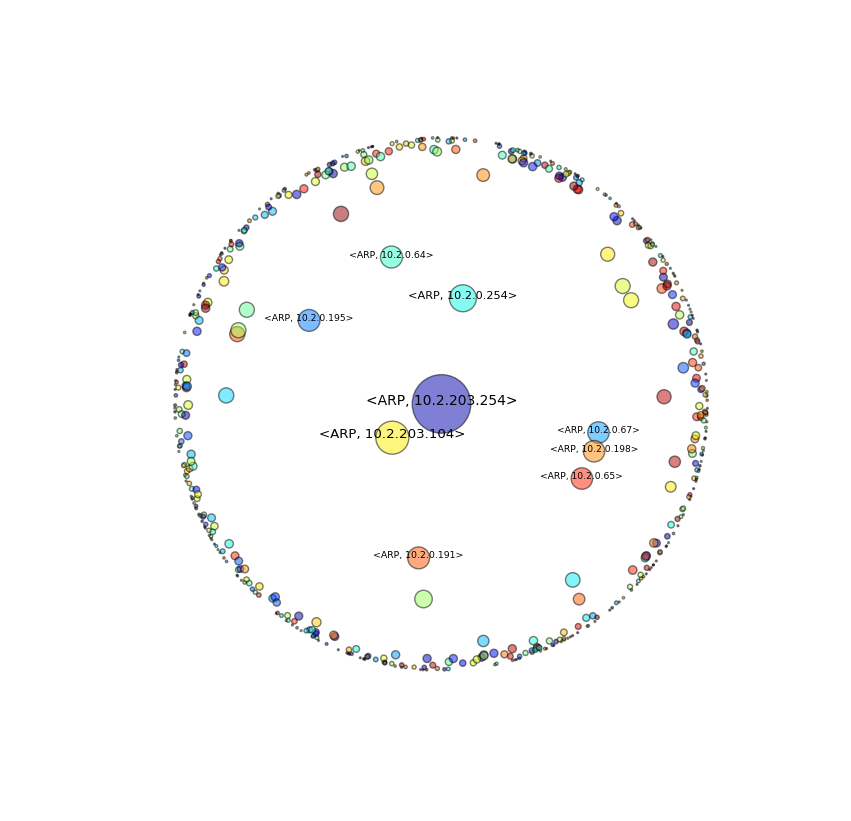

In [43]:
maxProbability = max(dfEthernet['probability'])
minProbability = min(dfEthernet['probability'])
np.random.seed(43)

N = len(dfEthernet)

radius = lambda p: (p - maxProbability) / (minProbability - maxProbability)
vradius = np.vectorize(radius)

dist = N**vradius(dfEthernet['probability'])
theta = np.random.rand(N) * np.pi * 2
x = dist * np.cos(theta)
y = dist * np.sin(theta)

colors = np.random.rand(N)
area = (dfEthernet['probability']**0.8)*5000

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

for i in range(len(dfEthernet)):
    if dfEthernet['information'][i] < entropy:
        fs = min(25*dfEthernet['probability'][i]**0.35, 10)
        plt.text(x[i], y[i], dfEthernet['symbol'][i], horizontalalignment='center', fontsize=fs)

plt.axis('off')
plt.show()
